# Lab 1, Maria

## A little Statistics
### 1: Converting a probability into a 'sigma'. 
As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and standard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.

### Part A- Background info

The Normal distribution, aka Gaussian, has the following functional form:

$$ h(x) = p(x \mid \mu,\sigma) = N(x|\mu,\sigma) \equiv \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

In plain English, this is the probability of x given $(\mu, \sigma)$. 

Features of a Normal Distribution include:
* looks like a bell (bell curve)
* mean = median = mode
* symmetry about the center, implying 50% of values less than the mean, and 50% greater than the mean
* area under the curve

The Gaussian looks like a bell curve:

In [164]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm

In [3]:
mu=0
sigma=1
def example_gauss():
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    gauss = norm(mu, sigma).pdf(x)
    # actual plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axvline(mu, c='blue')
    ax.errorbar(mu, gauss.max() / 2., xerr=np.sqrt(2.*np.log(2.))*sigma, c='blue', capsize=4)
    plt.plot(x, gauss, ls='-', c='black', label=r'$\mu=%.1f,\ \sigma=%.1f$' % (mu, sigma))
    plt.hist(norm.rvs(mu,sigma, size = 100000), 100, density=True, color='orange')
    plt.ylim(0, gauss.max()*1.2)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Gaussian Distribution')
    plt.legend()
    plt.show()

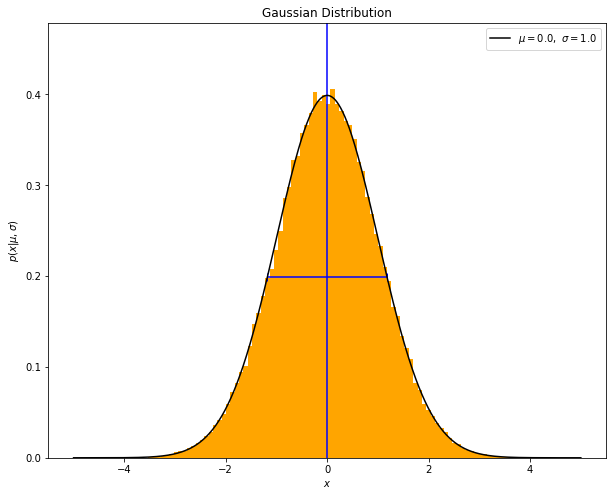

In [4]:
example_gauss()

As you can see, the mean, median and mode are at the same point (the peak), and there is symmetry to the graph. 

### Part B- Integration
Integrating the standard normal distribution is called the cumulative distribution function: 

$$\Phi(x') = \int_{-\infty}^{x'}  h(x)\,dx $$
$$\Phi(\infty) = 1.$$

and gives the probability that x will take a value less than x' (aka $x < x'$). It looks like this:

In [5]:
mu=0
sigma=1
h = norm(mu, sigma)
gauss_cdf = norm(mu, sigma).cdf

def plot_gauss_cdf():
    fig, ax = plt.subplots(figsize=(10, 8))
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    y = gauss_cdf(x)
    plt.plot(x, y, ls='-', c='black', label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
    plt.ylim(0, 1)
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Cumulative Distribution Function for a Normal Distribution')
    plt.legend()
    plt.show()

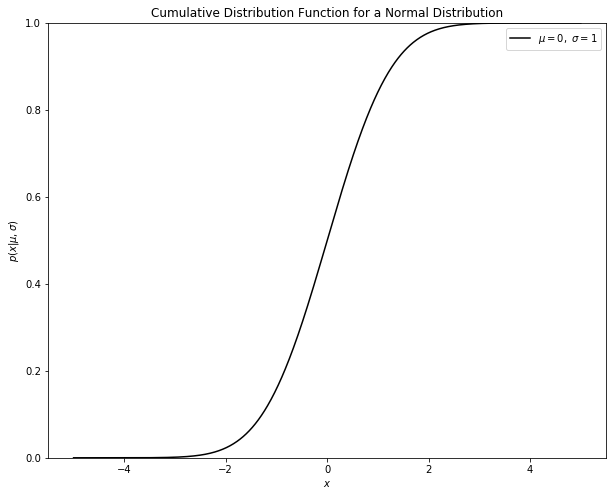

In [6]:
plot_gauss_cdf()

One useful tool realted to this is a z-table. A z-table is a mathematical table with values that correspond to the probability of an event. Essentially, the table relates a measurement (in units of $\sigma$) to probability.

To demonstrate this, let's integrate:

In [7]:
mu=0
sigma=1
h = norm(mu, sigma)

values = np.array([-2,-1,0,1,2])
prob = np.array([])
z = np.array([])

def Z(value, mu, sigma):
    return (value - mu)/sigma

for i in values:
    val = h.cdf(i)
    prob = np.append(prob, val)
    zboi = Z(i, mu, sigma)
    z = np.append(z, zboi)
    
print(prob, z)

[0.02275013 0.15865525 0.5        0.84134475 0.97724987] [-2. -1.  0.  1.  2.]


In the above code block, I took values from -2 to 2, and integrated the function from negative infinity, up to that value. What I get in return is the probability of an event x falling in that range. Looking at this z-table: https://en.wikipedia.org/wiki/Standard_normal_table the values line up, as expected.

### Part C- Throw it in reverse
The integrating is cool and all, but usually, a probability is known, and we want to know the $\sigma$ associated with that event. Essentially, we are working backwards to what I showed above. To demonstrate this, I will use the probabilities I got in the previous part:

In [8]:
values = np.array([])

for i in prob:
    val = h.ppf(i)
    values = np.append(values, val)    
print(values)

[-2. -1.  0.  1.  2.]


### Pseudo-part D, an addendum
Recall that the cdf is an integral from negative infinity to x, but when we are looking for an X$\sigma$ event, we want the integral *from* x to positive infinity. If done the other way, a minus sign appears. Note its presence in z-score for probabilities lesser than 0.5.

### 2: Now let's explore some other continuous analytic distributions. 
Following the pattern from the first HW assigment, I made both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time not the Gaussian. This time, I am using a Rayleigh distribution.

### Part A- Background
The Rayleigh distribution has the following functional form:

$$f(x,\sigma) = {\frac {x}{\sigma^{2}}}{\exp\left({\frac {-x^2} {2\sigma ^{2}}}\right)} \text { , for } {\displaystyle x\geq 0} $$

In simple English, this means that the Rayleigh distribution is continuous for nonnegative-valued variables. 

Features of a Rayleigh distribution include:
* looks like a skewed bell curve
* mode = $\sigma$
* mean = $\sigma {\sqrt {\frac {\pi }{2}}}$
* Median = $\sigma \sqrt {2 \ln{2}} $

Fun fact- It is a special case of a $\chi$ distribution with two degrees of freedom.

Its pdf is mathematically described as:

$$ F(x, \sigma) = 1 - \exp\left({\frac{-x^{2}} {2\sigma ^{2}}}\right) \text{ , for } {\displaystyle x\in [0,\infty )}$$

It can also be described as an integral, the same as for a Normal distribution.

### Part B- Plotting
The plots below demonstrate the text above via Rayleigh distributions with $\sigma$ = [0.5, 1, 2, 5].

In [16]:
sigmas= np.array([0.5, 1, 2, 5])

def example_rayleigh():
    for i in sigmas:
        x = np.linspace(0, 5*i, 100000)
        realization = stats.rayleigh.rvs(scale= i, size=100000)
        analytic = stats.rayleigh.pdf(x, scale=i)
        fig, ax = plt.subplots(figsize=(8, 6))
        plt.plot(x, analytic, ls='-', c='black', label=r'$\sigma=%.1f$' % (i))
        plt.hist(realization, 50, density=True, color='orange')
        plt.ylim(0, analytic.max()*1.2)
        plt.xlabel('$x$')
        plt.ylabel(r'$p(x|\mu,\sigma)$')
        plt.title('Rayleigh Distribution')
        plt.legend()
        plt.show()

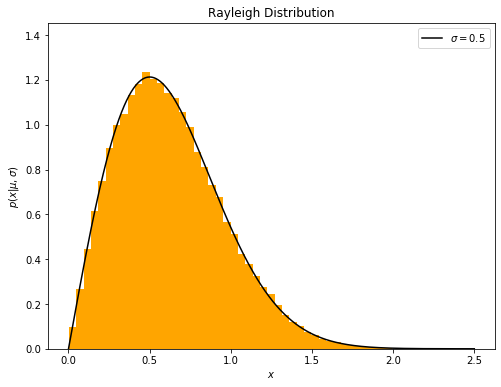

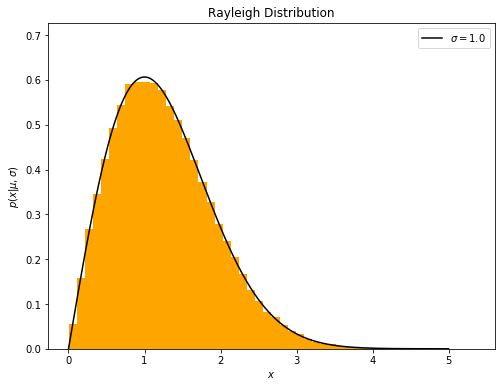

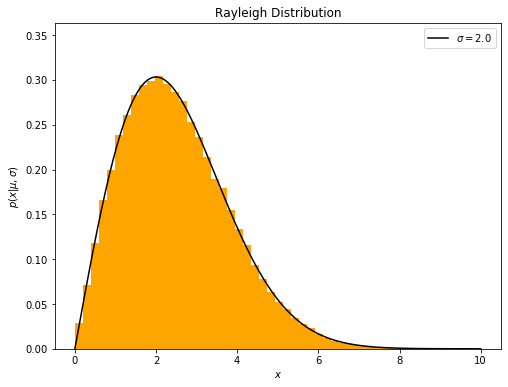

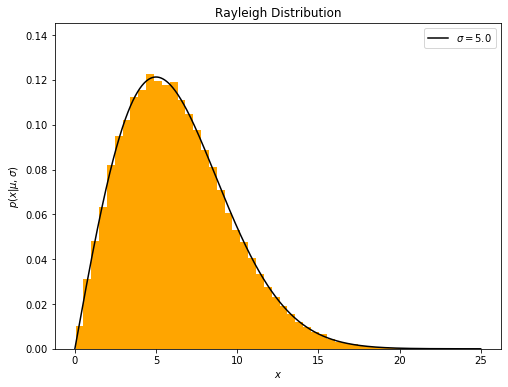

In [14]:
example_rayleigh()

### 3: Signal-free data
Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'. 

### Part A- Selecting a value

I have selected $x' = 15$, and I am using my last generated distribution (the $\sigma$ = 5 one).

### Part B- Stating the statistical question

The statistical question in my words is this:

What is the probability that the background generates a signal of value x or greater?

From Prof. Morales: If there is no signal, and the signal-free data has a Gaussian distribution (Gaussian null-hypothesis); what is the probability that the data produces a signal that is equally or more signal-like than what I observed?

### Part C- Question as a mathematic expression

$$ p(x = 15, \sigma = 5) = \int_{x}^{\infty}{f(x, \sigma)} dx = \int_{15}^{\infty}{\frac {x}{\sigma^{2}}}{\exp\left({\frac {-x^2} {2\sigma ^{2}}}\right)}dx  $$

### Part D- Calculations
Here are the calculations of the probability that the background produced the signal, and a visual for what I am looking for:

In [125]:
def my_rayleigh_logged():
    sigma = 5
    x = np.linspace(0, 5*sigma, 100000)
    realization = stats.rayleigh.rvs(scale= sigma, size=100000)
    analytic = stats.rayleigh.pdf(x, scale=sigma)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.semilogy(x, analytic, ls='-', c='black', linewidth = 3, label=r'$\sigma=%.1f$' % (sigma))
    plt.hist(realization, 100, density=True, alpha = 0.7)
    plt.vlines(15, 0, analytic.max()*1.2, ls = '--', linewidth = 3, color = 'green', label = 'measurement')
    plt.xlabel('$x$')
    plt.ylabel(r'$p(x|\mu,\sigma)$')
    plt.title('Rayleigh Distribution, semi-logged')
    plt.legend()
    plt.show()
    return

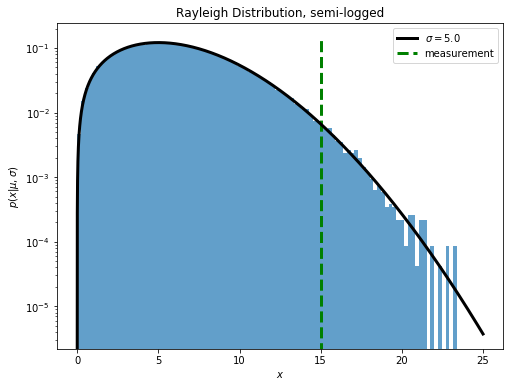

In [126]:
my_rayleigh_logged()

In [114]:
measurement = 15
sigma = 5
distribution = stats.rayleigh(scale = sigma)
cdfval = 1 - distribution.cdf(measurement) # cdf goes from -inf to value, need the other side
print(f"The probability of the background giving signal-like noise of value 15 or greater is {cdfval*100:.2f} %.")

The probability of the background giving signal-like noise of value 15 or greater is 1.11 %.


### Part E- Equivalent $\sigma$
Convert your probability into an equivalent '$\sigma$':

This involves using stats.norm.ppf() because we are equating the probability of the event happening within the chosen distribution to the probability of it occuring associated with a normal distribution via the null hypothesis. We do this to express our probability as an X$\sigma$ event.

In [127]:
ppfval = stats.norm.ppf(1 - cdfval) # 1- cdfval enforces correct signage 
print(f"This is a {ppfval:.3f}σ event.")

This is a 2.287σ event.


Looking at our previously mentioned z-tables, this lines up.

### 4: Exploration time
Now explore a little bit. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. Discuss the patterns that you see.

I will use values above, below, and at the mean of the distribution to see what changes. In particular, I will be using measurements = [1, 5, 10, 24].

In [166]:
measurements = np.array([1,5,10,24])
distribution = stats.rayleigh(scale = sigma)
cdfvals = (1 - distribution.cdf(measurements)).transpose()
ppfvals = (stats.norm.ppf(1- cdfvals)).transpose()
table = pd.DataFrame({"Probability (percent)": cdfvals * 100, r"X$\sigma$": ppfvals})
table = table.rename(index={0: "1", 1: "5", 2: "10", 3: "24"})
table = table.rename_axis("measurements", axis="columns")
table

measurements,Probability (percent),X$\sigma$
1,98.019867,-2.057870
5,60.653066,-0.270288
10,13.533528,1.101520
24,0.000993,4.266470


Given the question that I was asking, which is probability of signal-like background noise being generated at a measurement value or higher, this makes sense. The larger the measurement value, the less likely the background is to generate that value. The z-scores for measurement values less than the mean are negative because they are located to the left of the mean, thus they are negative $\sigma$ values away from the mean. Everything checks out!

## Non-continuous distributions
In many physics contexts we are counting discrete events. We can detect 9 gamma-rays or 10 gamma-rays, but 9.2 gamma-rays makes no sense. In these contexts the continuous distributions make no sense and we instead must use discrete distributions. The two most common of these are the Binomial and the Poisson (which is a limiting case of the Binomial). I am studying Poisson.

### Part A- background
Read up on the distributions

### Part B- plotting
Make a series of plots with different parameters; and explain the features. (Hint: your plots will need to be discrete, sometimes 'stairs' style plots can be helpful).

### Part C- questioning
Again define a hypothetical question (clearly stated), and calculate the corresponding probability

### Part D- implications
Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.

### Part E- pondering continuity
While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't. 



